In [18]:
# %load retrieve_sentences.py
import pandas as pd
from link_scraper import get_10qs, query_api
from html_to_text import *
import re
import random
import nltk
from nltk.collocations import *
import bs4
import requests

random.seed(15)  # set rng seed for reproducibility
# nltk.download('punkt')#NEED TO download sentence parser (if not already done)


### Get all 10q's into a single dataframe

In [ ]:
#Create list of all txt files
all_urls = open('links.txt').read().splitlines()
num_urls = len(all_urls)
print(num_urls)

In [ ]:
#Retrieve documents as strings and add to a list
documents = []
for document in all_urls:
    body = html_to_text(document)
    documents.append(body)

In [ ]:
full_text = pd.DataFrame()
full_text['filename'] = all_urls
full_text['body'] = documents
full_text.head()

In [ ]:
full_text['body'] = full_text['body'].apply(lambda x: nltk.sent_tokenize(x))

In [ ]:
# full_text.to_csv('/Users/kunal/Documents/DSCI400/code/all10q.csv')
qdata = pd.read_csv('all10q.csv')

In [45]:
del qdata['Unnamed: 0']

In [54]:
#pd.set_option('display.max_colwidth', -1)
pd.reset_option("^display")

In [118]:
qdata['CIK'] = (qdata['filename'].str.rsplit("/")).str[6].astype('int64')

In [119]:
# Read in CIKTicker CSV to combine URL with company name
ciktickers = pd.read_csv('TechStocks_NameCIKTicker.csv')

In [120]:
ciktickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
CompanyName    69 non-null object
CIK            69 non-null int64
Ticker         69 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


In [121]:
name_qdata = pd.merge(left=qdata,right=ciktickers, left_on='CIK', right_on='CIK')

In [123]:
del name_qdata['CIK']

In [125]:
name_qdata.rename(columns={'filename':'sec_url'}, inplace=True)

In [126]:
name_qdata.head()

,sec_url,body,cik,CompanyName,Ticker
0,https://www.sec.gov/Archives/edgar/data/320193...,['\n10-Q\n1\na10-qq320186302018.htm\n10-Q\n\n\...,320193,Apple Inc,AAPL
1,https://www.sec.gov/Archives/edgar/data/320193...,['\n10-Q\n1\na10-qq220183312018.htm\n10-Q\n\n\...,320193,Apple Inc,AAPL
2,https://www.sec.gov/Archives/edgar/data/320193...,['\n10-Q\n1\na10-qq1201812302017.htm\n10-Q\n\n...,320193,Apple Inc,AAPL
3,https://www.sec.gov/Archives/edgar/data/146737...,['\n10-Q\n1\nacn1130201810-q.htm\n10-Q\n\n\n\n...,1467373,Accenture PLC,ACN
4,https://www.sec.gov/Archives/edgar/data/146737...,['\n10-Q\n1\nacn2018053110-q.htm\n10-Q\n\n\n\n...,1467373,Accenture PLC,ACN


In [135]:
name_qdata.to_csv('/Users/kunal/Documents/DSCI400/code/10q_compname.csv')

### Read in 10q_compname.csv

In [ ]:
# %load retrieve_sentences.py
'''
Creates a text file given a 10-q url

For a given url, should output:
    sentences (good_sents [list])
    document (good_doc [string])
Includes minor pre-processing  to remove special chars
'''
import pandas as pd
from link_scraper import get_10qs, query_api
from html_to_text import *
import re
import random
import nltk
from nltk.collocations import *


def makeText(url, index):
    #Retrieve document
    document = html_to_text(url)

    #An example of retrieving sentences
    sentences = nltk.sent_tokenize(document)
    print(len(sentences))
    num_good_sents = 0
    good_sents = []
    def check_for_formatting(string):
        #Ignore sentences with annoying syntax
        #TODO: figure out how to remove backslash and maybe also remove tabs?
        regex = re.compile('[☒_☐@#^&*()<>?/\|}{~:]|\s\s')
        if(regex.search(string) == None):
            return True

    for sentence in sentences:
        if check_for_formatting(sentence):
            num_good_sents = num_good_sents+1
            good_sents.append(sentence)
            # print(sentence)

    print("Total acceptable sentences =",num_good_sents)
    #Converting the sentences to a document
    good_doc = " ".join(good_sents)
    text_file = open("txt_files/" + str(index) + ".txt", "w")
    text_file.write(good_doc)
    text_file.close()



# random.seed(15)  # set rng seed for reproducibility
# # nltk.download('punkt')#NEED TO download sentence parser (if not already done)

# #Select random 10-q from list of all
# all_urls = open('links.txt').read().splitlines()
# num_urls = len(all_urls)
# rand_url = random.randint(0, num_urls - 1)
# url = all_urls[rand_url]
# makeText(url, rand_url)



# DOESN'T work yet
# # Taken from https://stackoverflow.com/questions/2452982/how-to-extract-common-significant-phrases-from-a-series-of-text-entries
# bigram_measures = nltk.collocations.BigramAssocMeasures()
# trigram_measures = nltk.collocations.TrigramAssocMeasures()
# finder = TrigramCollocationFinder.from_words(good_doc)
# finder.apply_freq_filter(3)
# print('Best Trigrams')
# print(finder.nbest(trigram_measures.pmi, 10))
# ## For looking at sentences
# # for counter in range(5):
# #     print(sentences[3+counter])




In [146]:
def check_for_formatting(string):
        #Ignore sentences with annoying syntax
        #TODO: figure out how to remove backslash and maybe also remove tabs?
        regex = re.compile('[☒_☐@#^&*()<>?/\|}{~:]|\s\s')
        if(regex.search(string) == None):
            return True
        
def formatting_body(sentences):
    #Ignore sentences with annoying syntax
    #TODO: figure out how to remove backslash and maybe also remove tabs?
    good_sents = []
    for sentence in sentences:
        if check_for_formatting(sentence):
            good_sents.append(sentence)
    return good_sents
            # print(sentence)


In [147]:
name_qdata2 = name_qdata

In [148]:
name_qdata2['clean_body'] = name_qdata2['body'].apply(lambda x: formatting_body(x))

In [141]:
name_qdata2.to_csv('/Users/kunal/Documents/DSCI400/code/test_clean.csv')

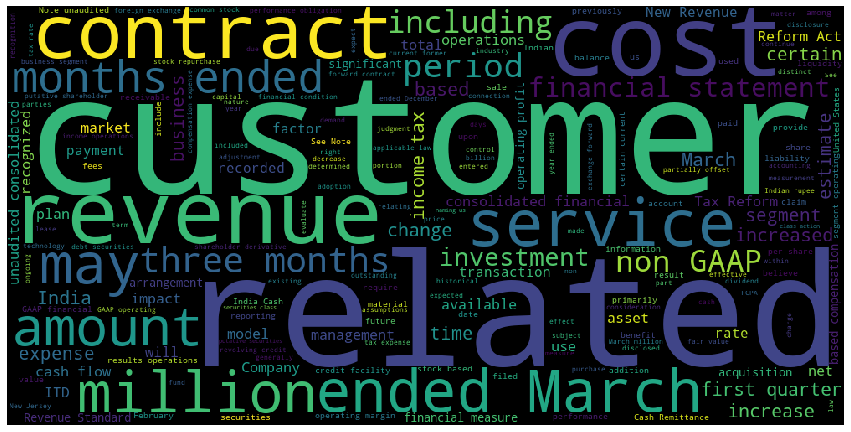

In [10]:
'''
Determining frequent and important phrases below here
'''
# Use WordCloud to visualize the most used words in this doc 
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
unique_string=(" ").join(good_sents)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()